In [2]:
!pip install autokeras -q

     |████████████████████████████████| 160 kB 27.2 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 462 kB 65.1 MB/s 


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [6]:
# ładowanie dedykowanej klasy z Autokeras
from autokeras import StructuredDataClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [8]:
auto_ai = StructuredDataClassifier(max_trials=5)
auto_ai.fit(X_train, y_train)

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9718309640884399

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 30s
INFO:tensorflow:Oracle triggered exit
15/15 [==============================] - 1s 3ms/step - loss: 0.5584 - accuracy: 0.7121
INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


In [9]:
auto_ai.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.3845 - accuracy: 0.8509


[0.38446518778800964, 0.8508771657943726]

In [10]:
model = auto_ai.export_model()

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 30)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 30)               61        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                992       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [12]:
model.predict(X_test[:5])

array([[0.6257859 ],
       [0.457745  ],
       [0.51472616],
       [0.6731889 ],
       [0.7923988 ]], dtype=float32)

In [13]:
y_test[:5]

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

In [14]:
# autokeras w regresji
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ds = load_boston()

X = ds.data
y = ds.target

X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [17]:
from autokeras import StructuredDataRegressor

In [18]:
auto_ai = StructuredDataRegressor(max_trials=5, loss="mae")
auto_ai.fit(X_train, y_train)

Trial 5 Complete [00h 00m 16s]
val_loss: 2.914764165878296

Best val_loss So Far: 2.7021143436431885
Total elapsed time: 00h 03m 46s
INFO:tensorflow:Oracle triggered exit
13/13 [==============================] - 0s 2ms/step - loss: 22.4826 - mean_squared_error: 591.2307
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [19]:
auto_ai.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 21.1620 - mean_squared_error: 520.5249


[21.161958694458008, 520.52490234375]

In [20]:
model = auto_ai.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 13)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 regression_head_1 (Dense)   (None, 1)                 33    

In [22]:
from tensorflow.keras.utils import plot_model

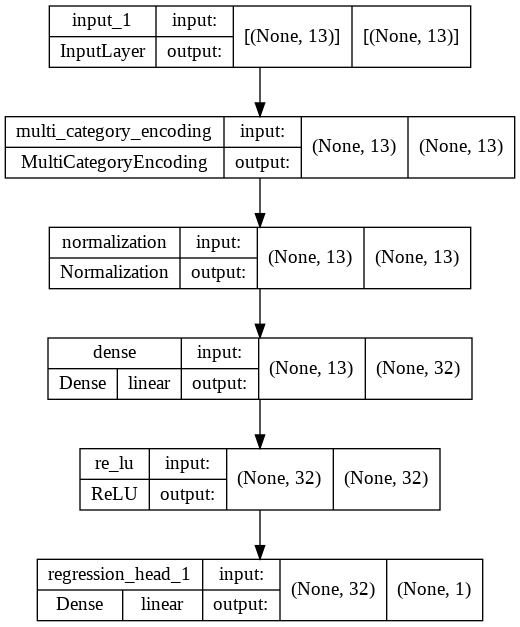

In [24]:
plot_model(model, show_shapes=True, show_layer_activations=True)